In [99]:
import pandas as pd
import matplotlib.pyplot as plt

In [100]:
df = pd.read_excel("Dados314.xlsx", sheet_name="Dados novos")

In [101]:
corr = df['Streaming'].corr(df['TikTok'], method='spearman')

In [102]:
print(corr)

0.3327763464313168


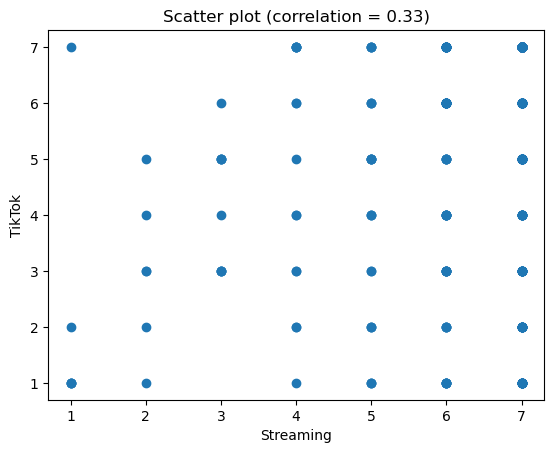

In [103]:
#scatter plot normal
plt.figure()
plt.scatter(df['Streaming'], df['TikTok'])
plt.xlabel('Streaming')
plt.ylabel('TikTok')
plt.title(f'Scatter plot (correlation = {corr:.2f})')

plt.show()

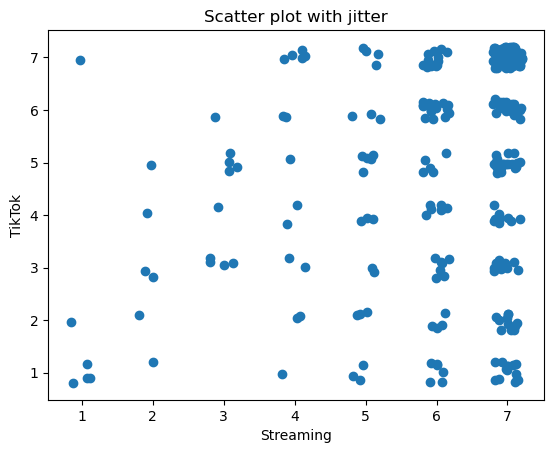

In [104]:
#scatterplot com jitter
import numpy as np

x = df['Streaming'] + np.random.uniform(-0.2, 0.2, size=len(df))
y = df['TikTok'] + np.random.uniform(-0.2, 0.2, size=len(df))

plt.figure()
plt.scatter(x, y)
plt.xlabel('Streaming')
plt.ylabel('TikTok')
plt.title('Scatter plot with jitter')
plt.show()

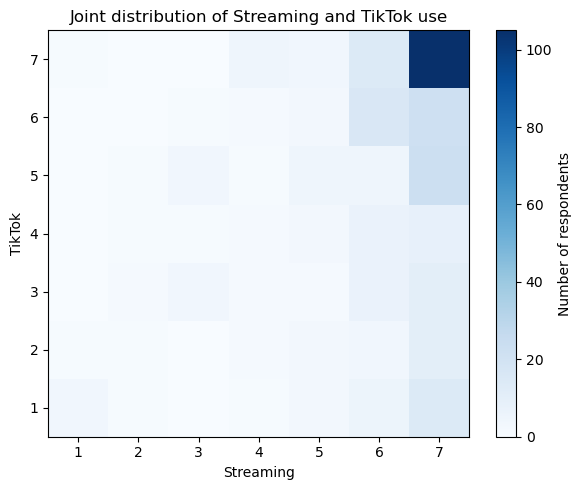

In [118]:
bins = [0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5]
plt.figure(figsize=(6, 5))
plt.hist2d(
    df['Streaming'],
    df['TikTok'],
    bins=[bins, bins],
    cmap='Blues'
)
plt.colorbar(label='Number of respondents')
plt.xlabel('Streaming')
plt.ylabel('TikTok')
plt.title('Joint distribution of Streaming and TikTok use')
plt.tight_layout()
plt.show()

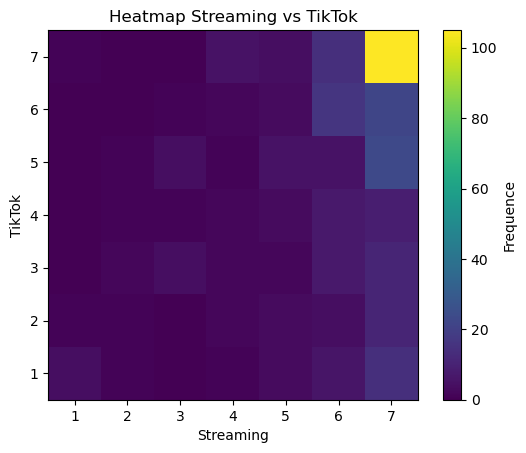

In [106]:
#heatmap

# Criar tabela de frequência
tabela = pd.crosstab(df['TikTok'], df['Streaming'])

# Criar heatmap
plt.figure()
plt.imshow(tabela)
plt.colorbar(label='Frequence')
plt.xlabel('Streaming')
plt.ylabel('TikTok')
plt.title('Heatmap Streaming vs TikTok')

# Ajustar ticks
plt.xticks(range(len(tabela.columns)), tabela.columns)
plt.yticks(range(len(tabela.index)), tabela.index)
plt.gca().invert_yaxis()
plt.show()

Cluster Analysis

In [107]:
from sklearn.preprocessing import StandardScaler

# -----------------------------
# criar construtos (médias)
# -----------------------------
constructs = pd.DataFrame({
    "PDV": df[["PDV1", "PDV2", "PDV3"]].mean(axis=1),
    "EE": df[["EE1", "EE2", "EE3", "EE4"]].mean(axis=1),
    "FC": df[["FC1", "FC2", "FC3", "FC4"]].mean(axis=1),
    "CR": df[["CR1", "CR2", "CR3"]].mean(axis=1),
    "PI": df[["PI1", "PI2", "PI3"]].mean(axis=1),
    "HM": df[["HM1", "HM2", "HM3"]].mean(axis=1),
    "INT": df[["INT1", "INT2", "INT3"]].mean(axis=1),
    "GAM": df[["GAM1", "GAM2", "GAM3", "GAM4", "GAM5", "GAM6"]].mean(axis=1),
    "TEI": df[["TEI1", "TEI2", "TEI3"]].mean(axis=1),
    "USE": df[["U1", "U2"]].mean(axis=1)
})


In [108]:
#normalizar
scaler = StandardScaler()
X_scaled = scaler.fit_transform(constructs)


C:\Users\nonot\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\nonot\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\nonot\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\nonot\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

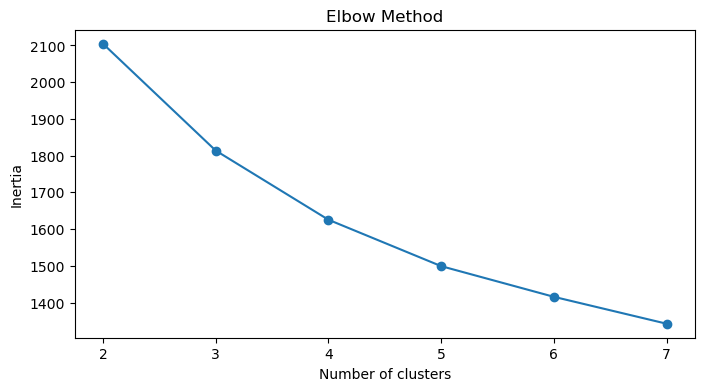

In [109]:
from sklearn.cluster import KMeans

inertia = []

K = range(2, 8)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=20)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(K, inertia, marker="o")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()


In [110]:
from sklearn.metrics import silhouette_score

for k in range(2, 8):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=20)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    print(f"k={k} → Silhouette Score: {score:.3f}")


C:\Users\nonot\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


k=2 → Silhouette Score: 0.301


C:\Users\nonot\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


k=3 → Silhouette Score: 0.186


C:\Users\nonot\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


k=4 → Silhouette Score: 0.172


C:\Users\nonot\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


k=5 → Silhouette Score: 0.157


C:\Users\nonot\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


k=6 → Silhouette Score: 0.154


C:\Users\nonot\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


k=7 → Silhouette Score: 0.151


In [111]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=20)
constructs["Cluster"] = kmeans.fit_predict(X_scaled)


C:\Users\nonot\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [112]:
constructs["Cluster"] = constructs["Cluster"] + 1
cluster_profiles = constructs.groupby("Cluster").mean()
print(cluster_profiles)


              PDV        EE        FC        CR        PI        HM       INT  \
Cluster                                                                         
1        4.856771  5.376953  5.408203  4.164062  4.684896  5.768229  5.406250   
2        2.160643  3.548193  3.924699  2.244980  3.172691  3.048193  2.405622   
3        4.223301  5.274272  5.441748  2.051780  2.304207  5.171521  4.660194   

              GAM       TEI       USE  
Cluster                                
1        4.453125  4.552083  5.472656  
2        2.799197  2.192771  2.168675  
3        2.849515  3.689320  4.839806  


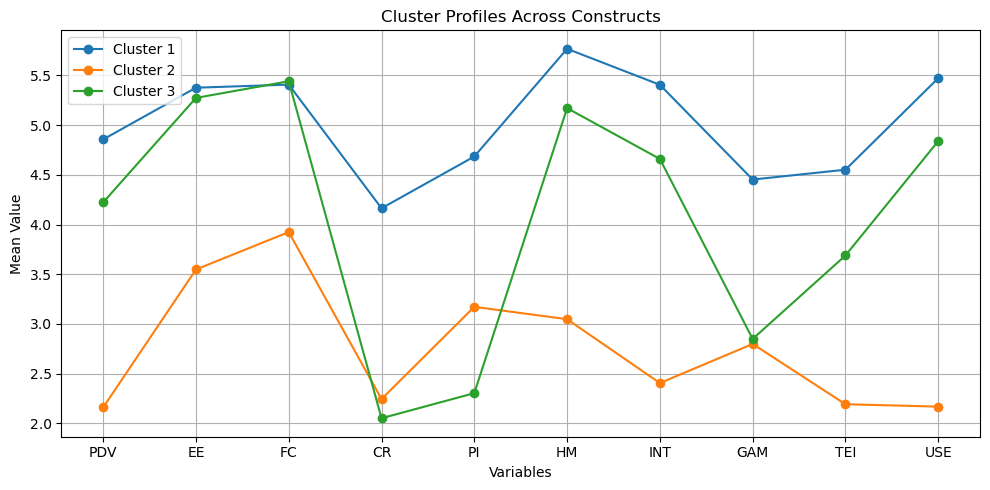

In [113]:
plt.figure(figsize=(10, 5))

for cluster in cluster_profiles.index:
    plt.plot(
        cluster_profiles.loc[cluster],
        marker="o",
        label=f"Cluster {cluster}"
    )

plt.xlabel("Variables")
plt.ylabel("Mean Value")
plt.title("Cluster Profiles Across Constructs")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [114]:
df_clusters = pd.concat([
    df[["Age", "Gender", "Education"]],
    constructs
], axis=1)


df_clusters.groupby("Cluster")["Gender"].value_counts(normalize=True)


Cluster  Gender
1        Female    0.742188
         Male      0.250000
         Other     0.007812
2        Male      0.518072
         Female    0.469880
         Other     0.012048
3        Female    0.737864
         Male      0.233010
         Other     0.029126
Name: proportion, dtype: float64

In [115]:
df_clusters.groupby("Cluster")[["Age"]].mean()

,Age
Cluster,
1,23.085938
2,26.867470
3,23.485437


In [116]:
df_clusters.groupby("Cluster")["Education"].value_counts(normalize=True)

Cluster  Education        
1        High school          0.398438
         Bachelor's degree    0.375000
         Master's degree      0.156250
         Below high school    0.062500
         PhD                  0.007812
2        Bachelor's degree    0.409639
         Master's degree      0.277108
         High school          0.228916
         Below high school    0.072289
         PhD                  0.012048
3        Bachelor's degree    0.427184
         High school          0.281553
         Master's degree      0.194175
         Below high school    0.097087
Name: proportion, dtype: float64

Cluster 1: high engagement, younger, women
Cluster 2: low engagement, older, men
Cluster 3: medium engagement and age, women

In [117]:
# number of respondents per cluster
cluster_sizes = constructs["Cluster"].value_counts().sort_index()
print(cluster_sizes)


Cluster
1    128
2     83
3    103
Name: count, dtype: int64
